In [1]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('blinkit_delivery_dataset.csv')

# See first 5 rows
df.head()


,Order_ID,Order_Time,Delivery_Time,Location,Item_Category,Quantity,Revenue,Delivery_Duration,Customer_Rating
0,ORD0001,2025-01-07 19:28:00,2025-01-07 19:52:00,Chennai,Instant Foods,3,400.86,24,5
1,ORD0002,2025-01-07 18:22:00,2025-01-07 18:42:00,Hyderabad,Fruits,3,439.78,20,4
2,ORD0003,2025-01-08 23:02:00,2025-01-08 23:33:00,Kolkata,Dairy,1,486.46,31,4
3,ORD0004,2025-01-30 05:01:00,2025-01-30 05:31:00,Pune,Fruits,1,186.91,30,5
4,ORD0005,2025-01-12 16:26:00,2025-01-12 17:03:00,Chennai,Snacks,4,214.86,37,3


In [2]:
# Convert order and delivery time to datetime
df['Order_Time'] = pd.to_datetime(df['Order_Time'])
df['Delivery_Time'] = pd.to_datetime(df['Delivery_Time'])
df.head()


,Order_ID,Order_Time,Delivery_Time,Location,Item_Category,Quantity,Revenue,Delivery_Duration,Customer_Rating
0,ORD0001,2025-01-07 19:28:00,2025-01-07 19:52:00,Chennai,Instant Foods,3,400.86,24,5
1,ORD0002,2025-01-07 18:22:00,2025-01-07 18:42:00,Hyderabad,Fruits,3,439.78,20,4
2,ORD0003,2025-01-08 23:02:00,2025-01-08 23:33:00,Kolkata,Dairy,1,486.46,31,4
3,ORD0004,2025-01-30 05:01:00,2025-01-30 05:31:00,Pune,Fruits,1,186.91,30,5
4,ORD0005,2025-01-12 16:26:00,2025-01-12 17:03:00,Chennai,Snacks,4,214.86,37,3


In [3]:
# Create Hour, Date, Weekday, and Delayed columns
df['Hour'] = df['Order_Time'].dt.hour
df['Date'] = df['Order_Time'].dt.date
df['Weekday'] = df['Order_Time'].dt.day_name()
df['Delivery_Duration'] = (df['Delivery_Time'] - df['Order_Time']).dt.total_seconds()/60
df['Delayed'] = df['Delivery_Duration'] > 29  # True if delivery >29 mins

df.head()


,Order_ID,Order_Time,Delivery_Time,Location,Item_Category,Quantity,Revenue,Delivery_Duration,Customer_Rating,Hour,Date,Weekday,Delayed
0,ORD0001,2025-01-07 19:28:00,2025-01-07 19:52:00,Chennai,Instant Foods,3,400.86,24.0,5,19,2025-01-07,Tuesday,False
1,ORD0002,2025-01-07 18:22:00,2025-01-07 18:42:00,Hyderabad,Fruits,3,439.78,20.0,4,18,2025-01-07,Tuesday,False
2,ORD0003,2025-01-08 23:02:00,2025-01-08 23:33:00,Kolkata,Dairy,1,486.46,31.0,4,23,2025-01-08,Wednesday,True
3,ORD0004,2025-01-30 05:01:00,2025-01-30 05:31:00,Pune,Fruits,1,186.91,30.0,5,5,2025-01-30,Thursday,True
4,ORD0005,2025-01-12 16:26:00,2025-01-12 17:03:00,Chennai,Snacks,4,214.86,37.0,3,16,2025-01-12,Sunday,True


In [4]:
# Check data info
print(df.info())

# Check for missing values
print(df.isnull().sum())

# Quick stats
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Order_ID           300 non-null    object        
 1   Order_Time         300 non-null    datetime64[ns]
 2   Delivery_Time      300 non-null    datetime64[ns]
 3   Location           300 non-null    object        
 4   Item_Category      300 non-null    object        
 5   Quantity           300 non-null    int64         
 6   Revenue            300 non-null    float64       
 7   Delivery_Duration  300 non-null    float64       
 8   Customer_Rating    300 non-null    int64         
 9   Hour               300 non-null    int32         
 10  Date               300 non-null    object        
 11  Weekday            300 non-null    object        
 12  Delayed            300 non-null    bool          
dtypes: bool(1), datetime64[ns](2), float64(2), int32(1), int64(2), ob

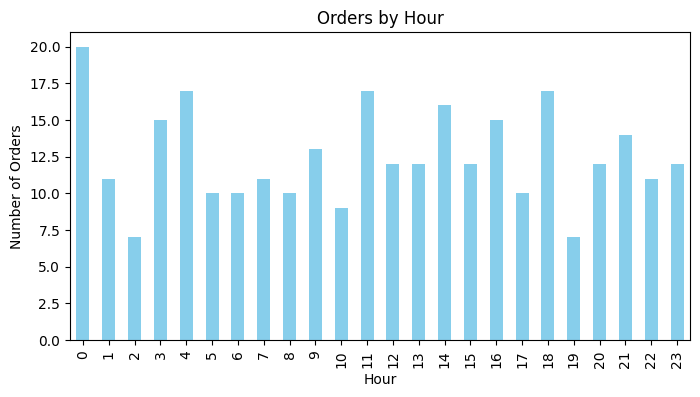

In [5]:
import matplotlib.pyplot as plt

# Count orders per hour
hourly_orders = df['Hour'].value_counts().sort_index()

# Plot
plt.figure(figsize=(8,4))
hourly_orders.plot(kind='bar', color='skyblue')
plt.title('Orders by Hour')
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.show()


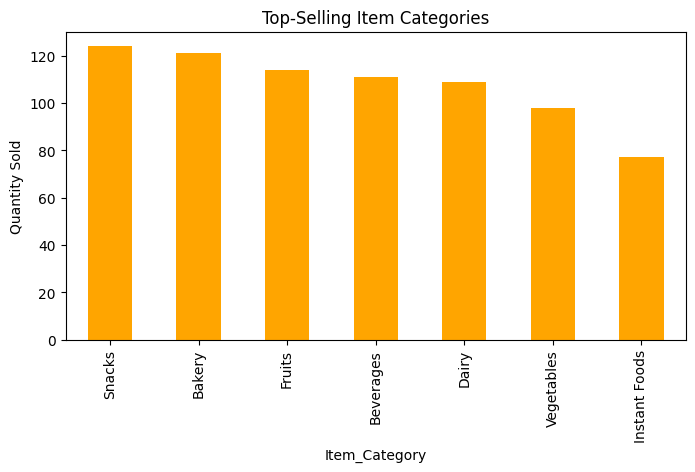

In [6]:
category_sales = df.groupby('Item_Category')['Quantity'].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(8,4))
category_sales.plot(kind='bar', color='orange')
plt.title('Top-Selling Item Categories')
plt.ylabel('Quantity Sold')
plt.show()


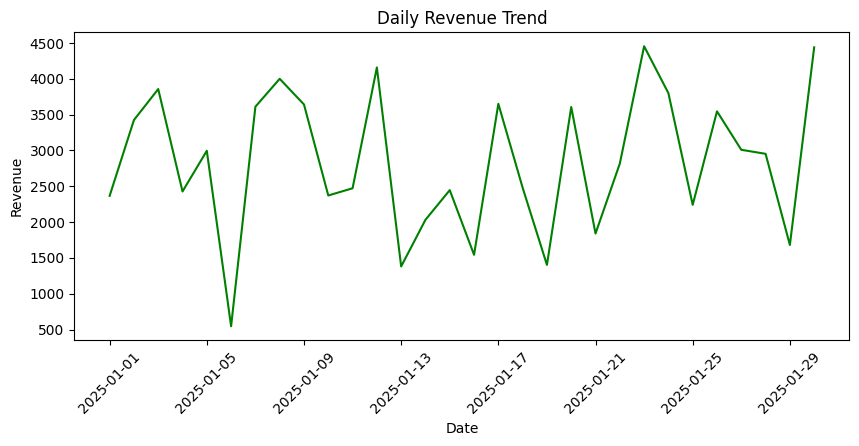

In [7]:
daily_revenue = df.groupby('Date')['Revenue'].sum()

plt.figure(figsize=(10,4))
daily_revenue.plot(color='green')
plt.title('Daily Revenue Trend')
plt.ylabel('Revenue')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.show()


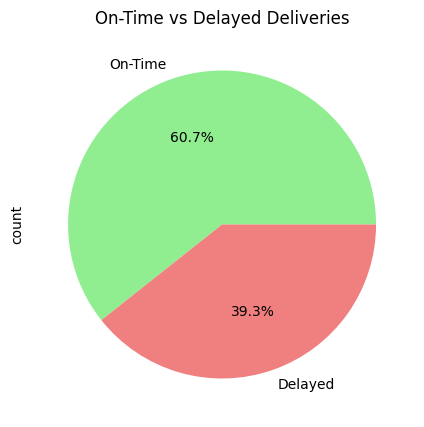

In [8]:
delays = df['Delayed'].value_counts()

plt.figure(figsize=(5,5))
delays.plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen','lightcoral'], labels=['On-Time','Delayed'])
plt.title('On-Time vs Delayed Deliveries')
plt.show()


In [12]:
# Save cleaned CSV for Power BI
df.to_csv('blinkit_cleaned.csv', index=False)
